In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

# Naive Bayes

### In all my project, I refer to positive as Outcome = 1 (positive diagnosis) and to negative as Outcome = 0.

In [50]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
dataset['Glucose'].fillna(dataset['Glucose'].mean(), inplace = True)
dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean(), inplace = True)
dataset['SkinThickness'].fillna(dataset['SkinThickness'].median(), inplace = True)
dataset['Insulin'].fillna(dataset['Insulin'].median(), inplace = True)
dataset['BMI'].fillna(dataset['BMI'].median(), inplace = True)

In [52]:
dataset['Pregnancies'] = pd.cut(dataset['Pregnancies'],bins=3,labels=['Small','Medium','Large'])
dataset['Age'] = pd.cut(dataset['Age'],bins=2,labels=['Young','Old'])

In [53]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Medium,148.0,72.0,35.0,125.0,33.6,0.627,Young,1
1,Small,85.0,66.0,29.0,125.0,26.6,0.351,Young,0
2,Medium,183.0,64.0,29.0,125.0,23.3,0.672,Young,1
3,Small,89.0,66.0,23.0,94.0,28.1,0.167,Young,0
4,Small,137.0,40.0,35.0,168.0,43.1,2.288,Young,1


In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  pd.DataFrame(sc.fit_transform(dataset.drop(["Pregnancies","Age","Outcome"],axis = 1),),
        columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction'])

In [55]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492
1,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061
2,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397
3,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763
4,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909


In [56]:
X['Pregnancies'] = dataset['Pregnancies']
X['Age'] = dataset['Age']

In [57]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies,Age
0,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,Medium,Young
1,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,Small,Young
2,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,Medium,Young
3,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,Small,Young
4,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,Small,Young


In [58]:
Y = dataset['Outcome']  # dataset.iloc[:,-1]

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape,

((614, 8), (154, 8), (614,), (154,))

### Computing probabilities

In [137]:
df_train = X_train 
df_train['Outcome'] = Y_train # data frame corresponding to the training data set plus the output label
# Number of positive/negative diabete diagnosis in the training data set 
total_positive = Y_train.value_counts()[1]
total_negative = Y_train.value_counts()[0]
total_Outcome = Y_train.count()
prob_positive = total_positive/total_Outcome
prob_negative = total_negative/total_Outcome

#### Compute probabilities for discrete features (Age and Pregnancies)

In [61]:
####################### Age #########################################
total_young = df_train['Age'].value_counts()[0]
total_Old = df_train['Age'].value_counts()[1]

young_and_positive = df_train[(df_train['Age'] =='Young') & (df_train['Outcome']== 1)].shape[0] # Total number of young people diagnosed with diabete
young_and_negative = df_train[(df_train['Age'] =='Young') & (df_train['Outcome']== 0)].shape[0] # Total number of young people not diagnosed with diabete

old_and_positive = df_train[(df_train['Age'] =='Old') & (df_train['Outcome']== 1)].shape[0]
old_and_negative = df_train[(df_train['Age'] =='Old') & (df_train['Outcome']== 0)].shape[0]



In [62]:
probTable_age = pd.DataFrame()
probTable_age['Conditional probability'] = ['P(Age=Young|Outcome =1)','P(Age=Young|Outcome =0)','P(Age=Old|Outcome =1)','P(Age=Old|Outcome =0)']
probTable_age['value']= [young_and_positive/total_positive, young_and_negative/total_negative, old_and_positive/total_positive, old_and_negative/total_negative]
probTable_age

,Conditional probability,value
0,P(Age=Young|Outcome =1),0.868778
1,P(Age=Young|Outcome =0),0.913486
2,P(Age=Old|Outcome =1),0.131222
3,P(Age=Old|Outcome =0),0.086514


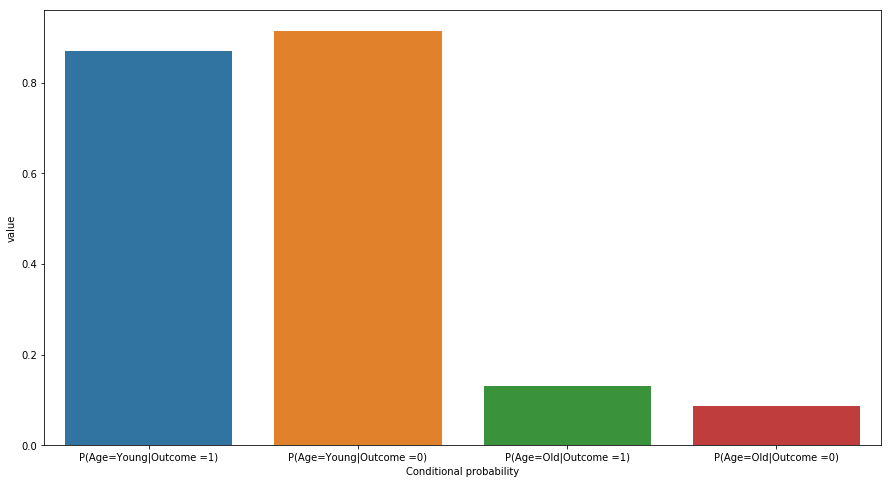

In [63]:
plt.figure(figsize=(15,8))
ax1 = sns.barplot(x="Conditional probability", y="value", data=probTable_age)

In [64]:
####################### Pregnancies #########################################
total_small = df_train['Pregnancies'].value_counts()[0]
total_medium = df_train['Pregnancies'].value_counts()[1]
total_large = df_train['Pregnancies'].value_counts()[2]

small_and_positive = df_train[(df_train['Pregnancies'] =='Small') & (df_train['Outcome']== 1)].shape[0]
small_and_negative = df_train[(df_train['Pregnancies'] =='Small') & (df_train['Outcome']== 0)].shape[0]

medium_and_positive = df_train[(df_train['Pregnancies'] =='Medium') & (df_train['Outcome']== 1)].shape[0]
medium_and_negative = df_train[(df_train['Pregnancies'] =='Medium') & (df_train['Outcome']== 0)].shape[0]

large_and_positive = df_train[(df_train['Pregnancies'] =='Large') & (df_train['Outcome']== 1)].shape[0]
large_and_negative = df_train[(df_train['Pregnancies'] =='Large') & (df_train['Outcome']== 0)].shape[0]



In [65]:
probTable_pregnancies = pd.DataFrame()
probTable_pregnancies['Conditional probability'] = ['P(Pregnancies=Small|Outcome =1)','P(Pregnancies=Small|Outcome =0)','P(Pregnancies=Medium|Outcome =1)','P(Pregnancies=Medium|Outcome =0)','P(Pregnancies=Large|Outcome =1)','P(Pregnancies=Large|Outcome =0)']
probTable_pregnancies['value']= [small_and_positive/total_positive, small_and_negative/total_negative, medium_and_positive/total_positive, medium_and_negative/total_negative, large_and_positive/total_positive, large_and_negative/total_negative]
probTable_pregnancies

,Conditional probability,value
0,P(Pregnancies=Small|Outcome =1),0.583710
1,P(Pregnancies=Small|Outcome =0),0.773537
2,P(Pregnancies=Medium|Outcome =1),0.361991
3,P(Pregnancies=Medium|Outcome =0),0.206107
4,P(Pregnancies=Large|Outcome =1),0.054299
5,P(Pregnancies=Large|Outcome =0),0.020356


0.36199095022624433

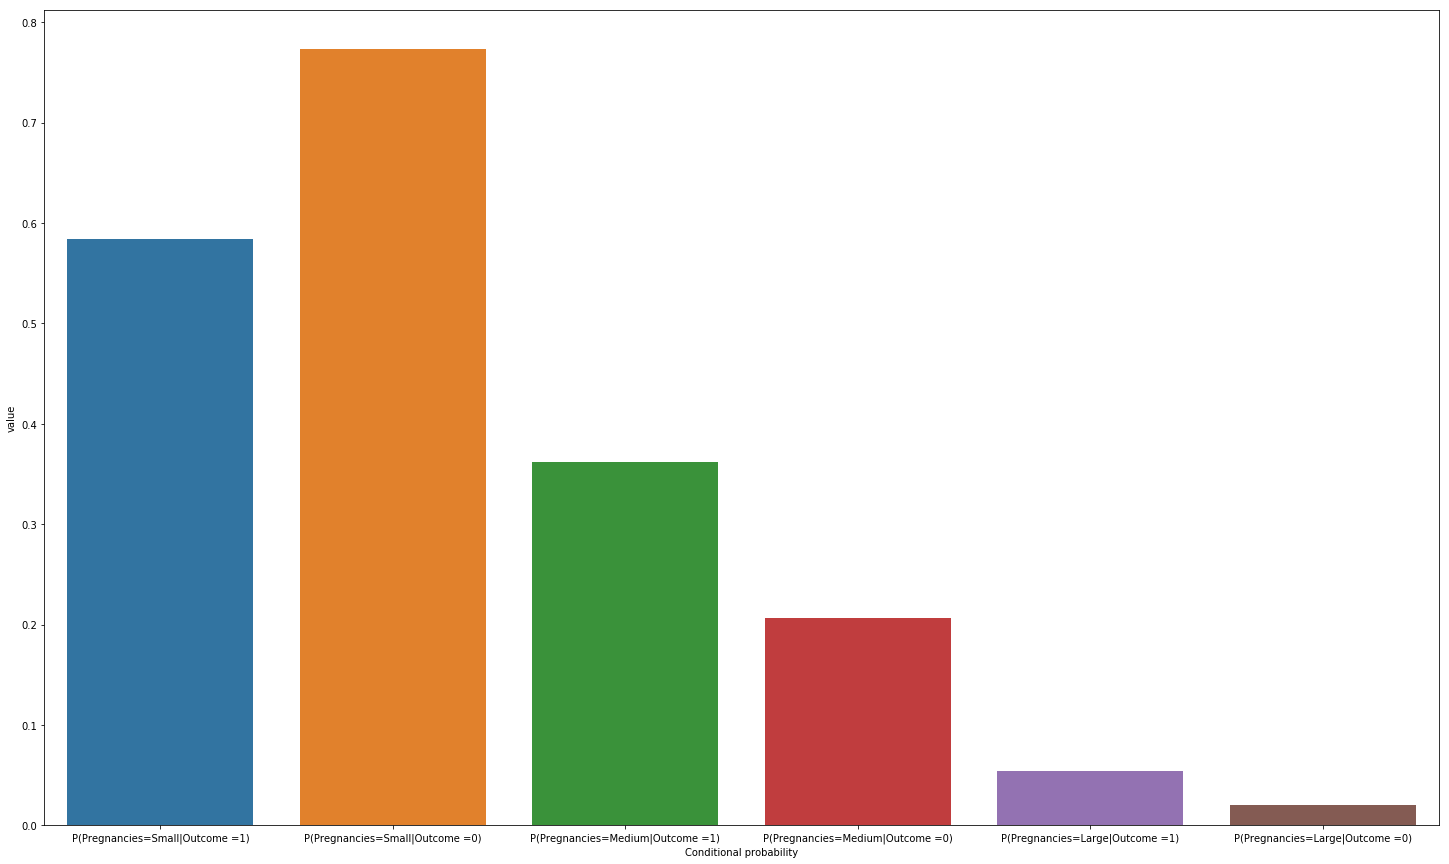

In [66]:
plt.figure(figsize=(25,15))
ax1 = sns.barplot(x="Conditional probability", y="value", data=probTable_pregnancies)

#### Compute probabilities for continuous features
For these continuous features, we assume that each term in the likelihood is a normal probability density function.

## $P(xi|c) = \frac{1}{(2*\pi*sigma\text{_xi_c})^\frac{1}{2}}*\exp(-\frac{(xi - mean\text{_xi_c})^2}{2*sigma\text{_xi_c}^2})$


In [67]:
# Function to calculate the likelihood P(fetures|Outcome)
def density(x, variance_xy, mean_xy):
    dens = (1/(np.sqrt(2*np.pi*variance_xy))) * np.exp((-(x-mean_xy)**2)/(2*variance_xy))
    return dens
    

In [68]:
# Calculate mean and variance for each feature in the training data set
df_mean = df_train.groupby('Outcome').mean() # mean for each feature grouped by 'Outcome' in the data set 
df_variance = df_train.groupby('Outcome').var()

In [69]:
df_mean

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
Outcome,,,,,,
0,-0.365542,-0.088987,-0.129022,-0.129753,-0.214688,-0.139482
1,0.650197,0.213629,0.264791,0.273166,0.451454,0.202681


In [70]:
df_variance
df_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies,Age,Outcome
603,0.930863,4.628226e-01,-0.012301,-0.169957,0.399492,0.664800,Medium,Old,1
118,-0.811634,-1.026200e+00,-0.695245,-0.181541,-0.619327,-0.087210,Small,Young,0
247,1.424022,1.455504e+00,0.442995,6.247517,2.888322,-0.135532,Small,Young,0
157,-0.417106,-1.357094e+00,-0.922893,-0.065702,-1.055964,1.090636,Small,Young,0
468,-0.055456,1.175571e-15,-0.012301,-0.181541,-0.357345,-0.872441,Medium,Young,1


In [71]:
# Creating variables for clearance when calculating P(feature|Outcome) via the normal distribution function
############################ Means ######################################
# Positive diagnosis
glucose_positive_mean = df_mean['Glucose'][df_mean.index == 1].values[0]
bloodpressure_positive_mean = df_mean['BloodPressure'][df_mean.index == 1].values[0]
skinthinckness_positive_mean = df_mean['SkinThickness'][df_mean.index == 1].values[0]
insulin_positive_mean = df_mean['Insulin'][df_mean.index == 1].values[0]
bmi_positive_mean = df_mean['BMI'][df_mean.index == 1].values[0]
diabetePedigree_positive_mean = df_mean['DiabetesPedigreeFunction'][df_mean.index == 1].values[0]
# Negative diagnosis
glucose_negative_mean = df_mean['Glucose'][df_mean.index == 0].values[0]
bloodpressure_negative_mean = df_mean['BloodPressure'][df_mean.index == 0].values[0]
skinthinckness_negative_mean = df_mean['SkinThickness'][df_mean.index == 0].values[0]
insulin_negative_mean = df_mean['Insulin'][df_mean.index == 0].values[0]
bmi_negative_mean = df_mean['BMI'][df_mean.index == 1].values[0]
diabetePedigree_negative_mean = df_mean['DiabetesPedigreeFunction'][df_mean.index == 0].values[0]

######################### Variance #######################################
# Positive diagnosis
glucose_positive_variance = df_variance['Glucose'][df_mean.index == 1].values[0]
bloodpressure_positive_variance = df_variance['BloodPressure'][df_mean.index == 1].values[0]
skinthinckness_positive_variance = df_variance['SkinThickness'][df_mean.index == 1].values[0]
insulin_positive_variance = df_variance['Insulin'][df_mean.index == 1].values[0]
bmi_positive_variance = df_variance['BMI'][df_mean.index == 1].values[0]
diabetePedigree_positive_variance = df_variance['DiabetesPedigreeFunction'][df_mean.index == 1].values[0]
# Negative diagnosis
glucose_negative_variance = df_variance['Glucose'][df_mean.index == 0].values[0]
bloodpressure_negative_variance = df_variance['BloodPressure'][df_mean.index == 0].values[0]
skinthinckness_negative_variance = df_variance['SkinThickness'][df_mean.index == 0].values[0]
insulin_negative_variance = df_variance['Insulin'][df_mean.index == 0].values[0]
bmi_negative_variance = df_variance['BMI'][df_mean.index == 1].values[0]
diabetePedigree_negative_variance = df_variance['DiabetesPedigreeFunction'][df_mean.index == 0].values[0]

In [72]:
df_density = df_train.drop(columns =['Age','Pregnancies']) # a data frame for calculating probability densities
df_density.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
603,0.930863,4.628226e-01,-0.012301,-0.169957,0.399492,0.664800,1
118,-0.811634,-1.026200e+00,-0.695245,-0.181541,-0.619327,-0.087210,0
247,1.424022,1.455504e+00,0.442995,6.247517,2.888322,-0.135532,0
157,-0.417106,-1.357094e+00,-0.922893,-0.065702,-1.055964,1.090636,0
468,-0.055456,1.175571e-15,-0.012301,-0.181541,-0.357345,-0.872441,1


In [73]:
# Density for each feature
df_density['Glucose'][df_density['Outcome']==1] = df_density['Glucose'][df_density['Outcome']==1].apply(density, args = [glucose_positive_variance, glucose_positive_mean ])
df_density['Glucose'][df_density['Outcome']==0] = df_density['Glucose'][df_density['Outcome']==0].apply(density, args = [glucose_negative_variance, glucose_negative_mean ])

df_density['BloodPressure'][df_density['Outcome']==1] = df_density['BloodPressure'][df_density['Outcome']==1].apply(density, args = [bloodpressure_positive_variance, bloodpressure_positive_mean])
df_density['BloodPressure'][df_density['Outcome']==0] = df_density['BloodPressure'][df_density['Outcome']==0].apply(density, args = [bloodpressure_negative_variance, bloodpressure_negative_mean])

df_density['SkinThickness'][df_density['Outcome']==1] = df_density['SkinThickness'][df_density['Outcome']==1].apply(density, args = [skinthinckness_positive_variance, skinthinckness_positive_mean])
df_density['SkinThickness'][df_density['Outcome']==0] = df_density['SkinThickness'][df_density['Outcome']==0].apply(density, args = [skinthinckness_negative_variance, skinthinckness_negative_mean])

df_density['Insulin'][df_density['Outcome']==1] = df_density['Insulin'][df_density['Outcome']==1].apply(density, args = [insulin_positive_variance, insulin_positive_mean])
df_density['Insulin'][df_density['Outcome']==0] = df_density['Insulin'][df_density['Outcome']==0].apply(density, args = [insulin_negative_variance, insulin_negative_mean])

df_density['BMI'][df_density['Outcome']==1] = df_density['BMI'][df_density['Outcome']==1].apply(density, args = [bmi_positive_variance, bmi_positive_mean])
df_density['BMI'][df_density['Outcome']==0] = df_density['BMI'][df_density['Outcome']==0].apply(density, args = [bmi_negative_variance, bmi_negative_mean])

df_density['DiabetesPedigreeFunction'][df_density['Outcome']==1] = df_density['DiabetesPedigreeFunction'][df_density['Outcome']==1].apply(density, args = [diabetePedigree_positive_variance, diabetePedigree_positive_mean])
df_density['DiabetesPedigreeFunction'][df_density['Outcome']==0] = df_density['DiabetesPedigreeFunction'][df_density['Outcome']==0].apply(density, args = [diabetePedigree_negative_variance, diabetePedigree_negative_mean])

In [74]:
df_density.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
603,0.396143,0.378331,0.375481,3.191772e-01,0.408067,0.323025,1
118,0.423975,0.258026,0.346976,4.364342e-01,0.223930,0.440997,0
247,0.042476,0.114037,0.345761,1.089803e-11,0.018129,0.441732,0
157,0.492784,0.173763,0.294284,4.360622e-01,0.124059,0.174704,0
468,0.316364,0.381314,0.375481,3.179509e-01,0.289938,0.224383,1


#### Visualization of conditional probability for continuous features

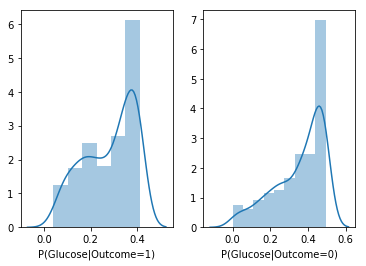

In [75]:
fig, axs = plt.subplots(ncols=2)
fig = sns.distplot(df_density['Glucose'][df_density['Outcome']==1], ax=axs[0]).set_xlabel("P(Glucose|Outcome=1)")
fig = sns.distplot(df_density['Glucose'][df_density['Outcome']==0], ax=axs[1]).set_xlabel("P(Glucose|Outcome=0)")

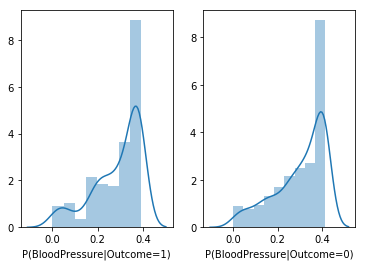

In [76]:
fig, axs = plt.subplots(ncols=2)
fig = sns.distplot(df_density['BloodPressure'][df_density['Outcome']==1], ax=axs[0]).set_xlabel("P(BloodPressure|Outcome=1)")
fig = sns.distplot(df_density['BloodPressure'][df_density['Outcome']==0], ax=axs[1]).set_xlabel("P(BloodPressure|Outcome=0)")

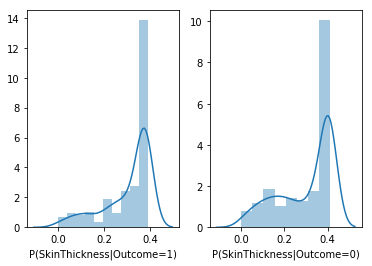

In [77]:
fig, axs = plt.subplots(ncols=2)
fig = sns.distplot(df_density['SkinThickness'][df_density['Outcome']==1], ax=axs[0]).set_xlabel("P(SkinThickness|Outcome=1)")
fig = sns.distplot(df_density['SkinThickness'][df_density['Outcome']==0], ax=axs[1]).set_xlabel("P(SkinThickness|Outcome=0)")

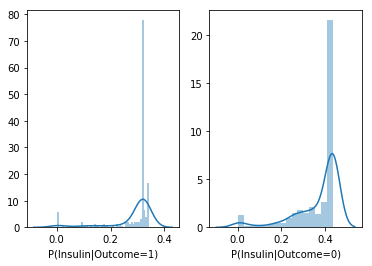

In [78]:
fig, axs = plt.subplots(ncols=2)
fig = sns.distplot(df_density['Insulin'][df_density['Outcome']==1], ax=axs[0]).set_xlabel("P(Insulin|Outcome=1)")
fig = sns.distplot(df_density['Insulin'][df_density['Outcome']==0], ax=axs[1]).set_xlabel("P(Insulin|Outcome=0)")

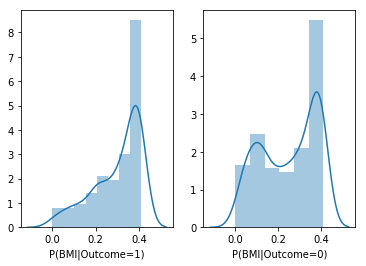

In [79]:
fig, axs = plt.subplots(ncols=2)
fig = sns.distplot(df_density['BMI'][df_density['Outcome']==1], ax=axs[0]).set_xlabel("P(BMI|Outcome=1)")
fig = sns.distplot(df_density['BMI'][df_density['Outcome']==0], ax=axs[1]).set_xlabel("P(BMI|Outcome=0)")

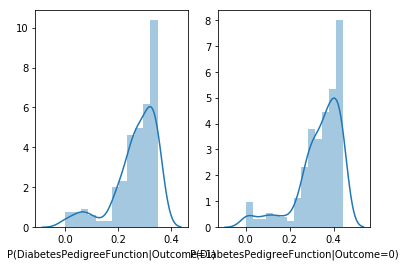

In [80]:
fig, axs = plt.subplots(ncols=2)
fig = sns.distplot(df_density['DiabetesPedigreeFunction'][df_density['Outcome']==1], ax=axs[0]).set_xlabel("P(DiabetesPedigreeFunction|Outcome=1)")
fig = sns.distplot(df_density['DiabetesPedigreeFunction'][df_density['Outcome']==0], ax=axs[1]).set_xlabel("P(DiabetesPedigreeFunction|Outcome=0)")

In [81]:
#df_density['BloodPressure'][df_density['Outcome']==1]

## Predict with Naive Bayes Classifier

### As we ignore the marginal probabilities (P(glucose), P(BloodPressure), P(Insulin) ...etc) in the denominator as they are constant, we only focus on computing the numerator of the posterior defined as :
P(Outcome)*P(Glucose|Outcome)*P(Insulin|Outcome)*P(BloodPressure|Outcome)*P(SkinThickness|Outcome)*P(BMI|Outcome)*P(Age|Outcome)*P(Pregnancies|Outcome)*





In [149]:
# Compute conditional probabilities for continuous and categorical variable in the test data for each class
def calculateDensity(testdata):
    df_prob_positive = testdata # conditional probabilities for Outcome = 1
    df_prob_negative = testdata # conditional probabilities for outcome = 0
    
    for column in testdata.columns :
        if column == 'Glucose':
            df_prob_positive[column] = df_prob_positive[column].apply(density, args = [glucose_positive_variance, glucose_positive_mean ])
            df_prob_negative[column] = df_prob_negative[column].apply(density, args = [glucose_negative_variance, glucose_negative_mean ])


        elif column == 'BloodPressure':
            df_prob_positive[column] = df_prob_positive[column].apply(density, args = [bloodpressure_positive_variance, bloodpressure_positive_mean])
            df_prob_negative[column] = df_prob_negative[column].apply(density, args = [bloodpressure_negative_variance, bloodpressure_negative_mean])


        elif column == 'SkinThickness':
            df_prob_positive[column] = df_prob_positive[column].apply(density, args = [skinthinckness_positive_variance, skinthinckness_positive_mean])
            df_prob_negative[column] = df_prob_negative[column].apply(density, args = [skinthinckness_negative_variance, skinthinckness_negative_mean])


        elif column == 'Insulin':
            df_prob_positive[column] = df_prob_positive[column].apply(density, args = [skinthinckness_positive_variance, skinthinckness_positive_mean])
            df_prob_negative[column] = df_prob_negative[column].apply(density, args = [skinthinckness_negative_variance, skinthinckness_negative_mean])


        elif column == 'BMI':
            df_prob_positive[column] = df_prob_positive[column].apply(density, args = [bmi_positive_variance, bmi_positive_mean])
            df_prob_negative[column] = df_prob_negative[column].apply(density, args = [bmi_negative_variance, bmi_negative_mean])


        elif column == 'DiabetesPedigreeFunction':
            df_prob_positive[column] = df_prob_positive[column].apply(density, args = [diabetePedigree_positive_variance, diabetePedigree_positive_mean])
            df_prob_negative[column] = df_prob_negative[column].apply(density, args = [diabetePedigree_negative_variance, diabetePedigree_negative_mean])
        
        elif column == 'Pregnancies':
            # Here below replacing the 'Medium' observation by the value of P(Pregnancies = Medium|Outcome)
            df_prob_positive[column].replace('Medium', probTable_pregnancies['value'][2], inplace = True)
            df_prob_negative[column].replace('Medium', probTable_pregnancies['value'][3], inplace = True)
            
            df_prob_negative[column].replace('Small', probTable_pregnancies['value'][0], inplace = True)
            df_prob_negative[column].replace('Small', probTable_pregnancies['value'][1], inplace = True)

            df_prob_negative[column].replace('Large', probTable_pregnancies['value'][4], inplace = True)
            df_prob_negative[column].replace('Large', probTable_pregnancies['value'][5], inplace = True)
        
        elif column == 'Age':
            df_prob_positive[column].replace('Young', probTable_age['value'][0], inplace = True)
            df_prob_positive[column].replace('Old', probTable_age['value'][1], inplace = True)
   
    return df_prob_positive, df_prob_negative

In [162]:
def getPredictions(test_data):
    class_list =[]
    positive_diagnosis, negative_diagnosis = calculateDensity(test_data)
    positive_diagnosis_product = positive_diagnosis.product(axis = 1) # Compute Product of conditional probabilities for all features for Outcome = 1
    negative_diagnosis_product = negative_diagnosis.product(axis = 1)
    for i in range(len(test_data)):
        p_1 = prob_positive*positive_diagnosis_product.iloc[i]
        p_0 = prob_negative*negative_diagnosis_product.iloc[i]
        if ( p_1 > p_0):
            class_list.append(1)
        else:
            class_list.append(0)
            
    return class_list
            

In [163]:
y_pred = getPredictions(X_test)

In [164]:
def accuracy(y, y_pred):
    accuracy = (np.sum(y == y_pred) / len(y))*100
    return accuracy

In [165]:
print("accuracy = {}".format(accuracy(Y_test,y_pred)))

accuracy = 69.48051948051948


In [166]:
############### Confusion Matrix ##############################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

mat_conf = confusion_matrix(Y_test,y_pred)
print('################### Confusion Matrix ##############')
print(mat_conf)
print('\n')
print('################### Report #########################')
print(classification_report(Y_test,y_pred))

################### Confusion Matrix ##############
[[107   0]
 [ 47   0]]


################### Report #########################
             precision    recall  f1-score   support

          0       0.69      1.00      0.82       107
          1       0.00      0.00      0.00        47

avg / total       0.48      0.69      0.57       154

